In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = np.hstack((x_csv[:, 0], x_csv[:, 2], x_csv[:, 3], x_csv[:, 5], x_csv[:, 6],
                       x_csv[:, 8], x_csv[:, 9], x_csv[:, 11], x_csv[:, 12], x_csv[:, 14]))

In [7]:
x_5degree.shape

(4380,)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 10, 1)


In [18]:
print(x_test.shape)

(44, 10, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               5632      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1029
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1020
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1001
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0963
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0906
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0871
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0856
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0850
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 87/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0809
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0809
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0786
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0786
Epoch 169/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0787
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0786
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 173/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 176/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0755
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0756
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0725
Epoch 332/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0729
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0724
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0727
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0723
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0727
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0724
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0697
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0701
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0697
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0681
Epoch 496/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0678
Epoch 497/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 498/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 500/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0679
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0679
Epoch 502/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 503/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0674
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 579/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 584/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 585/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 586/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 660/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 661/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 662/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 663/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 664/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 665/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 667/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0638
Epoch 668/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0642
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0626
Epoch 742/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0630
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0627
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0627
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0628
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0626
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 831/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0599
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0599
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0601
Epoch 911/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0599
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0596
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 914/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0597
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0585
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0586
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 992/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0586
Epoch 993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0590
Epoch 994/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 995/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0582
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1070/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 1071/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 1072/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0574
Epoch 1073/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 1074/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0573
Epoch 1075/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 1076/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0573
Epoch 1077/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0573
Epoch 1078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1079/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 1152/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0561
Epoch 1153/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 1155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 1156/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1157/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 1158/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1159/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0561
Epoch 1160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 1161/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 1234/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0551
Epoch 1235/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0554
Epoch 1236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0553
Epoch 1237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 1238/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 1239/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 1240/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0550
Epoch 1241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0550
Epoch 1242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 1243/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0538
Epoch 1316/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0537
Epoch 1317/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0540
Epoch 1318/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0537
Epoch 1319/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 1320/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 1321/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0539
Epoch 1322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0538
Epoch 1323/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0539
Epoch 1324/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 1325/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0528
Epoch 1398/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 1399/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0523
Epoch 1400/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0523
Epoch 1401/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 1402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 1403/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 1404/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0529
Epoch 1405/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 1406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0525
Epoch 1407/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 1480/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0515
Epoch 1481/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0515
Epoch 1482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1483/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0515
Epoch 1484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 1485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 1486/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0514
Epoch 1487/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0513
Epoch 1488/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0514
Epoch 1489/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0505
Epoch 1562/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 1563/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 1564/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 1565/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 1566/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0502
Epoch 1567/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 1568/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 1569/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0503
Epoch 1570/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 1571/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 1644/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 1645/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1646/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 1647/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0493
Epoch 1648/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0493
Epoch 1649/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0492
Epoch 1650/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 1651/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 1652/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 1653/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0488
Epoch 1726/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1727/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 1728/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0488
Epoch 1729/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1730/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1731/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1732/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 1733/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 1734/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0482
Epoch 1735/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 1808/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0471
Epoch 1809/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0472
Epoch 1810/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 1811/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 1812/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 1813/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 1814/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 1815/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 1816/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 1817/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 1890/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0472
Epoch 1891/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 1892/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 1893/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 1894/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 1895/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 1897/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 1899/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 1973/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 1975/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0459
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 1980/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 1981/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0448
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0447
Epoch 2059/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0448
Epoch 2060/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 2061/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 2062/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0448
Epoch 2063/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0441
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2137/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 2138/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2139/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0438
Epoch 2140/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2141/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 2142/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0442
Epoch 2143/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0442
Epoch 2144/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0442
Epoch 2145/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2218/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2219/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 2220/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 2221/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 2222/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 2223/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 2224/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 2225/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 2226/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 2227/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 2300/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 2301/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0427
Epoch 2302/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 2303/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0425
Epoch 2304/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 2305/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0420
Epoch 2306/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0420
Epoch 2307/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 2308/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 2309/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2382/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2383/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 2384/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0418
Epoch 2385/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 2386/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0410
Epoch 2387/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 2388/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0415
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 2391/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 2464/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 2465/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 2466/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 2473/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 2551/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0400
Epoch 2552/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 2553/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 2554/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 2555/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 2628/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0386
Epoch 2629/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 2630/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0391
Epoch 2631/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 2632/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0389
Epoch 2633/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 2634/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2635/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 2636/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2637/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 2710/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 2711/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 2712/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 2713/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 2714/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2715/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 2716/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 2717/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0385
Epoch 2718/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0383
Epoch 2719/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 2792/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2793/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 2794/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2795/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 2796/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2797/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 2798/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 2799/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2800/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2801/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 2874/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2875/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2876/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2877/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 2878/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 2879/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2880/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 2881/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2882/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 2883/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 2956/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0362
Epoch 2957/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 2958/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 2959/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 2960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 2961/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 2962/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 2963/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2964/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0372
Epoch 2965/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 3038/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0360
Epoch 3039/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 3040/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 3041/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 3042/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0359
Epoch 3043/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 3044/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0360
Epoch 3045/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 3046/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 3047/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 3120/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 3121/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 3122/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0351
Epoch 3123/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 3124/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 3125/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0361
Epoch 3126/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 3127/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 3128/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 3129/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 3202/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 3203/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0346
Epoch 3204/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0346
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0344
Epoch 3206/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 3207/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 3208/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0344
Epoch 3209/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3210/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3211/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0346
Epoch 3284/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 3285/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 3286/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 3287/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 3288/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 3289/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 3290/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0344
Epoch 3291/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 3292/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 3293/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0331
Epoch 3366/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 3367/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0330
Epoch 3368/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3369/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3370/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 3371/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 3372/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 3373/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0335
Epoch 3374/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 3375/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3448/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3449/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 3450/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3451/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0327
Epoch 3452/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 3453/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 3457/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3530/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3531/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3532/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3539/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 3620/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 3621/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0316
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 3702/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0312
Epoch 3703/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3777/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 3778/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 3779/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3780/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3781/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3782/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3783/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 3784/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3785/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 3858/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 3859/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 3860/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 3861/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 3862/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 3863/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 3864/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 3865/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 3866/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 3867/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 3940/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3941/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3942/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 3943/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 3944/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 3945/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0296
Epoch 3946/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 3947/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 3948/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 3949/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 4022/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 4023/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 4024/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 4025/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 4026/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 4027/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 4028/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 4029/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 4030/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 4031/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 4104/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 4105/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 4106/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 4107/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 4108/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 4109/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 4110/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 4111/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 4112/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 4113/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 4186/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 4187/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 4188/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 4189/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 4190/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 4191/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 4192/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 4193/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0301
Epoch 4194/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 4195/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 4268/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 4269/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 4270/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 4271/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 4272/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4273/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0276
Epoch 4274/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 4275/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 4276/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4277/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 4350/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0277
Epoch 4351/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0277
Epoch 4352/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0276
Epoch 4353/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 4354/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 4355/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0272
Epoch 4356/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9002e-04 - rmse: 0.0270
Epoch 4357/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9788e-04 - rmse: 0.0272
Epoch 4358/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 435

10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4431/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 4432/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4433/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 4434/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0272
Epoch 4435/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9937e-04 - rmse: 0.0272
Epoch 4436/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4437/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 4438/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0272
Epoch 4439/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4440/10

10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4511/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8847e-04 - rmse: 0.0270
Epoch 4512/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8584e-04 - rmse: 0.0269
Epoch 4513/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 4514/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4515/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 4516/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0272
Epoch 4517/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8440e-04 - rmse: 0.0269
Epoch 4518/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6343e-04 - rmse: 0.0265
Epoch 4519/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6015e-04 - rmse: 0.02

10/10 [==============================] - 0s 5ms/step - loss: 9.6182e-04 - rmse: 0.0265
Epoch 4590/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5642e-04 - rmse: 0.0264
Epoch 4591/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4374e-04 - rmse: 0.0261
Epoch 4592/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3839e-04 - rmse: 0.0260
Epoch 4593/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4764e-04 - rmse: 0.0262
Epoch 4594/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3631e-04 - rmse: 0.0260
Epoch 4595/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4871e-04 - rmse: 0.0262
Epoch 4596/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3764e-04 - rmse: 0.0260
Epoch 4597/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8316e-04 - rmse: 0.0269
Epoch 4598/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 9.3914e-04 - rmse: 0.0260
Epoch 4669/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1947e-04 - rmse: 0.0257
Epoch 4670/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3455e-04 - rmse: 0.0259
Epoch 4671/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4053e-04 - rmse: 0.0261
Epoch 4672/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4631e-04 - rmse: 0.0262
Epoch 4673/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4803e-04 - rmse: 0.0262
Epoch 4674/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4390e-04 - rmse: 0.0261
Epoch 4675/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5615e-04 - rmse: 0.0264
Epoch 4676/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2857e-04 - rmse: 0.0258
Epoch 4677/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 9.3913e-04 - rmse: 0.0260
Epoch 4748/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1129e-04 - rmse: 0.0255
Epoch 4749/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2963e-04 - rmse: 0.0258
Epoch 4750/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1756e-04 - rmse: 0.0256
Epoch 4751/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3393e-04 - rmse: 0.0259
Epoch 4752/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4440e-04 - rmse: 0.0261
Epoch 4753/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6128e-04 - rmse: 0.0264
Epoch 4754/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 4755/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6797e-04 - rmse: 0.0266
Epoch 4756/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9379e

Epoch 4826/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3236e-04 - rmse: 0.0259
Epoch 4827/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2973e-04 - rmse: 0.0258
Epoch 4828/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3761e-04 - rmse: 0.0260
Epoch 4829/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5968e-04 - rmse: 0.0264
Epoch 4830/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0481e-04 - rmse: 0.0254
Epoch 4831/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8563e-04 - rmse: 0.0250
Epoch 4832/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8103e-04 - rmse: 0.0249
Epoch 4833/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9835e-04 - rmse: 0.0252
Epoch 4834/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9655e-04 - rmse: 0.0252
Epoch 4835/10000
10/10 [==============================] - 0s 5ms

10/10 [==============================] - 0s 5ms/step - loss: 9.1820e-04 - rmse: 0.0256
Epoch 4905/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0584e-04 - rmse: 0.0254
Epoch 4906/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0031e-04 - rmse: 0.0253
Epoch 4907/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9747e-04 - rmse: 0.0252
Epoch 4908/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9215e-04 - rmse: 0.0251
Epoch 4909/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0640e-04 - rmse: 0.0254
Epoch 4910/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9099e-04 - rmse: 0.0251
Epoch 4911/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7951e-04 - rmse: 0.0248
Epoch 4912/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8236e-04 - rmse: 0.0249
Epoch 4913/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 9.4911e-04 - rmse: 0.0262
Epoch 4983/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1120e-04 - rmse: 0.0255
Epoch 4984/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0199e-04 - rmse: 0.0253
Epoch 4985/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8618e-04 - rmse: 0.0250
Epoch 4986/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7252e-04 - rmse: 0.0247
Epoch 4987/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6763e-04 - rmse: 0.0246
Epoch 4988/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6551e-04 - rmse: 0.0246
Epoch 4989/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6490e-04 - rmse: 0.0245
Epoch 4990/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7570e-04 - rmse: 0.0248
Epoch 4991/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.6633e-04 - rmse: 0.0246
Epoch 5061/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5293e-04 - rmse: 0.0243
Epoch 5062/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5879e-04 - rmse: 0.0244
Epoch 5063/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5297e-04 - rmse: 0.0243
Epoch 5064/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5966e-04 - rmse: 0.0244
Epoch 5065/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7249e-04 - rmse: 0.0247
Epoch 5066/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6695e-04 - rmse: 0.0246
Epoch 5067/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6074e-04 - rmse: 0.0245
Epoch 5068/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6594e-04 - rmse: 0.0246
Epoch 5069/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.6110e-04 - rmse: 0.0245
Epoch 5139/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6889e-04 - rmse: 0.0246
Epoch 5140/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5470e-04 - rmse: 0.0243
Epoch 5141/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4544e-04 - rmse: 0.0241
Epoch 5142/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2700e-04 - rmse: 0.0237
Epoch 5143/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5644e-04 - rmse: 0.0244
Epoch 5144/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3406e-04 - rmse: 0.0239
Epoch 5145/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6746e-04 - rmse: 0.0246
Epoch 5146/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6818e-04 - rmse: 0.0246
Epoch 5147/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.3095e-04 - rmse: 0.0238
Epoch 5217/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1251e-04 - rmse: 0.0234
Epoch 5218/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2149e-04 - rmse: 0.0236
Epoch 5219/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2744e-04 - rmse: 0.0238
Epoch 5220/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3634e-04 - rmse: 0.0239
Epoch 5221/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3022e-04 - rmse: 0.0238
Epoch 5222/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4422e-04 - rmse: 0.0241
Epoch 5223/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3834e-04 - rmse: 0.0240
Epoch 5224/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4468e-04 - rmse: 0.0241
Epoch 5225/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.2045e-04 - rmse: 0.0236
Epoch 5295/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1432e-04 - rmse: 0.0235
Epoch 5296/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0423e-04 - rmse: 0.0233
Epoch 5297/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1168e-04 - rmse: 0.0234
Epoch 5298/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1090e-04 - rmse: 0.0234
Epoch 5299/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9327e-04 - rmse: 0.0230
Epoch 5300/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1050e-04 - rmse: 0.0234
Epoch 5301/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0747e-04 - rmse: 0.0233
Epoch 5302/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0869e-04 - rmse: 0.0234
Epoch 5303/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 8.4403e-04 - rmse: 0.0241
Epoch 5373/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3382e-04 - rmse: 0.0239
Epoch 5374/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4561e-04 - rmse: 0.0241
Epoch 5375/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2898e-04 - rmse: 0.0238
Epoch 5376/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5372e-04 - rmse: 0.0243
Epoch 5377/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1943e-04 - rmse: 0.0236
Epoch 5378/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2383e-04 - rmse: 0.0237
Epoch 5379/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1426e-04 - rmse: 0.0235
Epoch 5380/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0883e-04 - rmse: 0.0234
Epoch 5381/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.3366e-04 - rmse: 0.0239
Epoch 5451/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4895e-04 - rmse: 0.0242
Epoch 5452/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2683e-04 - rmse: 0.0237
Epoch 5453/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1705e-04 - rmse: 0.0235
Epoch 5454/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1544e-04 - rmse: 0.0235
Epoch 5455/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0721e-04 - rmse: 0.0233
Epoch 5456/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0342e-04 - rmse: 0.0232
Epoch 5457/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0705e-04 - rmse: 0.0233
Epoch 5458/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1221e-04 - rmse: 0.0234
Epoch 5459/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 8.2731e-04 - rmse: 0.0237
Epoch 5529/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3949e-04 - rmse: 0.0240
Epoch 5530/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2820e-04 - rmse: 0.0238
Epoch 5531/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1607e-04 - rmse: 0.0235
Epoch 5532/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3545e-04 - rmse: 0.0239
Epoch 5533/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9351e-04 - rmse: 0.0230
Epoch 5534/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8913e-04 - rmse: 0.0229
Epoch 5535/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5379e-04 - rmse: 0.0243
Epoch 5536/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4202e-04 - rmse: 0.0241
Epoch 5537/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 7.6150e-04 - rmse: 0.0223
Epoch 5607/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4593e-04 - rmse: 0.0220
Epoch 5608/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4230e-04 - rmse: 0.0219
Epoch 5609/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7594e-04 - rmse: 0.0226
Epoch 5610/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7513e-04 - rmse: 0.0226
Epoch 5611/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6616e-04 - rmse: 0.0224
Epoch 5612/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8048e-04 - rmse: 0.0227
Epoch 5613/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8052e-04 - rmse: 0.0227
Epoch 5614/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7380e-04 - rmse: 0.0226
Epoch 5615/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.9151e-04 - rmse: 0.0230
Epoch 5685/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8308e-04 - rmse: 0.0228
Epoch 5686/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6809e-04 - rmse: 0.0225
Epoch 5687/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8574e-04 - rmse: 0.0229
Epoch 5688/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1764e-04 - rmse: 0.0235
Epoch 5689/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8774e-04 - rmse: 0.0229
Epoch 5690/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0206e-04 - rmse: 0.0232
Epoch 5691/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9057e-04 - rmse: 0.0230
Epoch 5692/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8483e-04 - rmse: 0.0228
Epoch 5693/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.3519e-04 - rmse: 0.0217
Epoch 5763/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3097e-04 - rmse: 0.0216
Epoch 5764/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5879e-04 - rmse: 0.0223
Epoch 5765/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5624e-04 - rmse: 0.0222
Epoch 5766/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5925e-04 - rmse: 0.0223
Epoch 5767/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4549e-04 - rmse: 0.0220
Epoch 5768/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3953e-04 - rmse: 0.0218
Epoch 5769/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7749e-04 - rmse: 0.0227
Epoch 5770/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7093e-04 - rmse: 0.0225
Epoch 5771/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 5ms/step - loss: 7.5795e-04 - rmse: 0.0222
Epoch 5841/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3133e-04 - rmse: 0.0216
Epoch 5842/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3794e-04 - rmse: 0.0218
Epoch 5843/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2109e-04 - rmse: 0.0214
Epoch 5844/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2414e-04 - rmse: 0.0215
Epoch 5845/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3246e-04 - rmse: 0.0217
Epoch 5846/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4247e-04 - rmse: 0.0219
Epoch 5847/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3077e-04 - rmse: 0.0216
Epoch 5848/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2394e-04 - rmse: 0.0215
Epoch 5849/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.2555e-04 - rmse: 0.0215
Epoch 5919/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5762e-04 - rmse: 0.0222
Epoch 5920/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3658e-04 - rmse: 0.0218
Epoch 5921/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4901e-04 - rmse: 0.0220
Epoch 5922/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6314e-04 - rmse: 0.0224
Epoch 5923/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6644e-04 - rmse: 0.0224
Epoch 5924/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4740e-04 - rmse: 0.0220
Epoch 5925/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4183e-04 - rmse: 0.0219
Epoch 5926/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2843e-04 - rmse: 0.0216
Epoch 5927/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 7.7324e-04 - rmse: 0.0226
Epoch 5997/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4194e-04 - rmse: 0.0219
Epoch 5998/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1925e-04 - rmse: 0.0214
Epoch 5999/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1611e-04 - rmse: 0.0213
Epoch 6000/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0798e-04 - rmse: 0.0211
Epoch 6001/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0183e-04 - rmse: 0.0209
Epoch 6002/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3981e-04 - rmse: 0.0218
Epoch 6003/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5530e-04 - rmse: 0.0222
Epoch 6004/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8218e-04 - rmse: 0.0228
Epoch 6005/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.1055e-04 - rmse: 0.0212
Epoch 6075/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0340e-04 - rmse: 0.0210
Epoch 6076/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3610e-04 - rmse: 0.0218
Epoch 6077/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1693e-04 - rmse: 0.0213
Epoch 6078/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0045e-04 - rmse: 0.0209
Epoch 6079/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9175e-04 - rmse: 0.0207
Epoch 6080/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0397e-04 - rmse: 0.0210
Epoch 6081/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9904e-04 - rmse: 0.0209
Epoch 6082/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1447e-04 - rmse: 0.0212
Epoch 6083/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 6.9511e-04 - rmse: 0.0208
Epoch 6153/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0977e-04 - rmse: 0.0211
Epoch 6154/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1867e-04 - rmse: 0.0214
Epoch 6155/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3236e-04 - rmse: 0.0217
Epoch 6156/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3873e-04 - rmse: 0.0218
Epoch 6157/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4210e-04 - rmse: 0.0219
Epoch 6158/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3359e-04 - rmse: 0.0217
Epoch 6159/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5228e-04 - rmse: 0.0221
Epoch 6160/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2973e-04 - rmse: 0.0216
Epoch 6161/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.0536e-04 - rmse: 0.0210
Epoch 6231/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3293e-04 - rmse: 0.0217
Epoch 6232/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3084e-04 - rmse: 0.0216
Epoch 6233/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0957e-04 - rmse: 0.0211
Epoch 6234/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0047e-04 - rmse: 0.0209
Epoch 6235/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2576e-04 - rmse: 0.0215
Epoch 6236/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1071e-04 - rmse: 0.0212
Epoch 6237/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1946e-04 - rmse: 0.0214
Epoch 6238/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9708e-04 - rmse: 0.0208
Epoch 6239/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0

10/10 [==============================] - 0s 6ms/step - loss: 6.7664e-04 - rmse: 0.0204
Epoch 6309/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8554e-04 - rmse: 0.0206
Epoch 6310/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6994e-04 - rmse: 0.0202
Epoch 6311/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6864e-04 - rmse: 0.0202
Epoch 6312/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6258e-04 - rmse: 0.0200
Epoch 6313/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6021e-04 - rmse: 0.0199
Epoch 6314/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7619e-04 - rmse: 0.0203
Epoch 6315/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7100e-04 - rmse: 0.0202
Epoch 6316/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6532e-04 - rmse: 0.0201
Epoch 6317/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.8961e-04 - rmse: 0.0207
Epoch 6387/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7493e-04 - rmse: 0.0203
Epoch 6388/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5934e-04 - rmse: 0.0199
Epoch 6389/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8832e-04 - rmse: 0.0206
Epoch 6390/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8575e-04 - rmse: 0.0206
Epoch 6391/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8415e-04 - rmse: 0.0205
Epoch 6392/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9082e-04 - rmse: 0.0207
Epoch 6393/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6992e-04 - rmse: 0.0202
Epoch 6394/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6959e-04 - rmse: 0.0202
Epoch 6395/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 5ms/step - loss: 6.7322e-04 - rmse: 0.0203
Epoch 6465/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8659e-04 - rmse: 0.0206
Epoch 6466/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8608e-04 - rmse: 0.0206
Epoch 6467/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3101e-04 - rmse: 0.0217
Epoch 6468/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1546e-04 - rmse: 0.0213
Epoch 6469/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0888e-04 - rmse: 0.0211
Epoch 6470/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0201e-04 - rmse: 0.0210
Epoch 6471/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0251e-04 - rmse: 0.0210
Epoch 6472/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9263e-04 - rmse: 0.0207
Epoch 6473/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.8051e-04 - rmse: 0.0205
Epoch 6543/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5961e-04 - rmse: 0.0199
Epoch 6544/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4977e-04 - rmse: 0.0197
Epoch 6545/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7457e-04 - rmse: 0.0203
Epoch 6546/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9096e-04 - rmse: 0.0207
Epoch 6547/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5972e-04 - rmse: 0.0199
Epoch 6548/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5827e-04 - rmse: 0.0199
Epoch 6549/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8505e-04 - rmse: 0.0206
Epoch 6550/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0585e-04 - rmse: 0.0211
Epoch 6551/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 6.4070e-04 - rmse: 0.0195
Epoch 6621/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3764e-04 - rmse: 0.0194
Epoch 6622/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4229e-04 - rmse: 0.0195
Epoch 6623/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3888e-04 - rmse: 0.0194
Epoch 6624/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1425e-04 - rmse: 0.0188
Epoch 6625/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2774e-04 - rmse: 0.0191
Epoch 6626/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6568e-04 - rmse: 0.0201
Epoch 6627/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5667e-04 - rmse: 0.0199
Epoch 6628/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3877e-04 - rmse: 0.0194
Epoch 6629/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.5213e-04 - rmse: 0.0198
Epoch 6699/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5697e-04 - rmse: 0.0199
Epoch 6700/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5755e-04 - rmse: 0.0199
Epoch 6701/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7379e-04 - rmse: 0.0203
Epoch 6702/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6227e-04 - rmse: 0.0200
Epoch 6703/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7859e-04 - rmse: 0.0204
Epoch 6704/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7934e-04 - rmse: 0.0204
Epoch 6705/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9615e-04 - rmse: 0.0208
Epoch 6706/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8134e-04 - rmse: 0.0205
Epoch 6707/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 6ms/step - loss: 6.5343e-04 - rmse: 0.0198
Epoch 6777/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6222e-04 - rmse: 0.0200
Epoch 6778/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5232e-04 - rmse: 0.0198
Epoch 6779/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2868e-04 - rmse: 0.0192
Epoch 6780/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1161e-04 - rmse: 0.0187
Epoch 6781/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1996e-04 - rmse: 0.0189
Epoch 6782/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2276e-04 - rmse: 0.0190
Epoch 6783/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2361e-04 - rmse: 0.0190
Epoch 6784/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3682e-04 - rmse: 0.0194
Epoch 6785/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.7657e-04 - rmse: 0.0204
Epoch 6855/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6996e-04 - rmse: 0.0202
Epoch 6856/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5763e-04 - rmse: 0.0199
Epoch 6857/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4749e-04 - rmse: 0.0197
Epoch 6858/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3224e-04 - rmse: 0.0193
Epoch 6859/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2638e-04 - rmse: 0.0191
Epoch 6860/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2883e-04 - rmse: 0.0192
Epoch 6861/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1364e-04 - rmse: 0.0188
Epoch 6862/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2286e-04 - rmse: 0.0190
Epoch 6863/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.4411e-04 - rmse: 0.0196
Epoch 6933/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4649e-04 - rmse: 0.0196
Epoch 6934/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3521e-04 - rmse: 0.0194
Epoch 6935/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1675e-04 - rmse: 0.0189
Epoch 6936/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3448e-04 - rmse: 0.0193
Epoch 6937/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1569e-04 - rmse: 0.0188
Epoch 6938/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2148e-04 - rmse: 0.0190
Epoch 6939/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2073e-04 - rmse: 0.0190
Epoch 6940/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9827e-04 - rmse: 0.0184
Epoch 6941/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.1278e-04 - rmse: 0.0188
Epoch 7011/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3067e-04 - rmse: 0.0192
Epoch 7012/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4419e-04 - rmse: 0.0196
Epoch 7013/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1685e-04 - rmse: 0.0189
Epoch 7014/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3628e-04 - rmse: 0.0194
Epoch 7015/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5198e-04 - rmse: 0.0198
Epoch 7016/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3740e-04 - rmse: 0.0194
Epoch 7017/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5000e-04 - rmse: 0.0197
Epoch 7018/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6378e-04 - rmse: 0.0201
Epoch 7019/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.5949e-04 - rmse: 0.0200
Epoch 7089/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2298e-04 - rmse: 0.0190
Epoch 7090/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0128e-04 - rmse: 0.0185
Epoch 7091/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2344e-04 - rmse: 0.0191
Epoch 7092/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2171e-04 - rmse: 0.0190
Epoch 7093/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0881e-04 - rmse: 0.0187
Epoch 7094/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9828e-04 - rmse: 0.0184
Epoch 7095/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9156e-04 - rmse: 0.0182
Epoch 7096/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8403e-04 - rmse: 0.0180
Epoch 7097/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 6.5663e-04 - rmse: 0.0199
Epoch 7167/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8197e-04 - rmse: 0.0205
Epoch 7168/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3915e-04 - rmse: 0.0195
Epoch 7169/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3399e-04 - rmse: 0.0193
Epoch 7170/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0664e-04 - rmse: 0.0186
Epoch 7171/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1697e-04 - rmse: 0.0189
Epoch 7172/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0773e-04 - rmse: 0.0187
Epoch 7173/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1402e-04 - rmse: 0.0188
Epoch 7174/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1724e-04 - rmse: 0.0189
Epoch 7175/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.2124e-04 - rmse: 0.0190
Epoch 7245/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0476e-04 - rmse: 0.0186
Epoch 7246/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0620e-04 - rmse: 0.0186
Epoch 7247/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0325e-04 - rmse: 0.0185
Epoch 7248/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9869e-04 - rmse: 0.0184
Epoch 7249/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8210e-04 - rmse: 0.0180
Epoch 7250/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8752e-04 - rmse: 0.0181
Epoch 7251/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7652e-04 - rmse: 0.0178
Epoch 7252/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8060e-04 - rmse: 0.0179
Epoch 7253/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.9150e-04 - rmse: 0.0182
Epoch 7323/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8043e-04 - rmse: 0.0179
Epoch 7324/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7852e-04 - rmse: 0.0179
Epoch 7325/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8938e-04 - rmse: 0.0182
Epoch 7326/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0518e-04 - rmse: 0.0186
Epoch 7327/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9198e-04 - rmse: 0.0182
Epoch 7328/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9412e-04 - rmse: 0.0183
Epoch 7329/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7898e-04 - rmse: 0.0179
Epoch 7330/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7226e-04 - rmse: 0.0177
Epoch 7331/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 6ms/step - loss: 6.0309e-04 - rmse: 0.0186
Epoch 7401/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9217e-04 - rmse: 0.0183
Epoch 7402/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8485e-04 - rmse: 0.0181
Epoch 7403/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5766e-04 - rmse: 0.0173
Epoch 7404/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7025e-04 - rmse: 0.0176
Epoch 7405/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6783e-04 - rmse: 0.0176
Epoch 7406/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7431e-04 - rmse: 0.0178
Epoch 7407/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8051e-04 - rmse: 0.0179
Epoch 7408/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7611e-04 - rmse: 0.0178
Epoch 7409/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.7963e-04 - rmse: 0.0179
Epoch 7479/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7641e-04 - rmse: 0.0178
Epoch 7480/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7661e-04 - rmse: 0.0178
Epoch 7481/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6660e-04 - rmse: 0.0176
Epoch 7482/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7390e-04 - rmse: 0.0178
Epoch 7483/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6613e-04 - rmse: 0.0175
Epoch 7484/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9180e-04 - rmse: 0.0183
Epoch 7485/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7722e-04 - rmse: 0.0179
Epoch 7486/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1565e-04 - rmse: 0.0189
Epoch 7487/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 5.5702e-04 - rmse: 0.0173
Epoch 7557/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6638e-04 - rmse: 0.0176
Epoch 7558/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5897e-04 - rmse: 0.0173
Epoch 7559/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8440e-04 - rmse: 0.0181
Epoch 7560/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0886e-04 - rmse: 0.0187
Epoch 7561/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8523e-04 - rmse: 0.0181
Epoch 7562/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9173e-04 - rmse: 0.0183
Epoch 7563/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2546e-04 - rmse: 0.0192
Epoch 7564/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2775e-04 - rmse: 0.0192
Epoch 7565/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6

10/10 [==============================] - 0s 6ms/step - loss: 5.7410e-04 - rmse: 0.0178
Epoch 7635/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6619e-04 - rmse: 0.0176
Epoch 7636/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7047e-04 - rmse: 0.0177
Epoch 7637/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5695e-04 - rmse: 0.0173
Epoch 7638/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6522e-04 - rmse: 0.0175
Epoch 7639/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6591e-04 - rmse: 0.0176
Epoch 7640/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4502e-04 - rmse: 0.0169
Epoch 7641/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3355e-04 - rmse: 0.0166
Epoch 7642/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4225e-04 - rmse: 0.0169
Epoch 7643/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.6941e-04 - rmse: 0.0177
Epoch 7713/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6518e-04 - rmse: 0.0175
Epoch 7714/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6970e-04 - rmse: 0.0177
Epoch 7715/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7146e-04 - rmse: 0.0177
Epoch 7716/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6378e-04 - rmse: 0.0175
Epoch 7717/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6011e-04 - rmse: 0.0174
Epoch 7718/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6627e-04 - rmse: 0.0176
Epoch 7719/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5443e-04 - rmse: 0.0172
Epoch 7720/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6704e-04 - rmse: 0.0176
Epoch 7721/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.5992e-04 - rmse: 0.0174
Epoch 7791/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6407e-04 - rmse: 0.0175
Epoch 7792/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6279e-04 - rmse: 0.0175
Epoch 7793/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9874e-04 - rmse: 0.0185
Epoch 7794/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9358e-04 - rmse: 0.0183
Epoch 7795/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7535e-04 - rmse: 0.0178
Epoch 7796/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6718e-04 - rmse: 0.0176
Epoch 7797/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6075e-04 - rmse: 0.0174
Epoch 7798/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3974e-04 - rmse: 0.0168
Epoch 7799/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.4696e-04 - rmse: 0.0170
Epoch 7869/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5319e-04 - rmse: 0.0172
Epoch 7870/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4160e-04 - rmse: 0.0169
Epoch 7871/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6741e-04 - rmse: 0.0176
Epoch 7872/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6219e-04 - rmse: 0.0175
Epoch 7873/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6087e-04 - rmse: 0.0174
Epoch 7874/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5141e-04 - rmse: 0.0172
Epoch 7875/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7127e-04 - rmse: 0.0177
Epoch 7876/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4697e-04 - rmse: 0.0170
Epoch 7877/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 6ms/step - loss: 5.4866e-04 - rmse: 0.0171
Epoch 7947/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3936e-04 - rmse: 0.0168
Epoch 7948/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2615e-04 - rmse: 0.0164
Epoch 7949/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2898e-04 - rmse: 0.0165
Epoch 7950/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2701e-04 - rmse: 0.0165
Epoch 7951/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1432e-04 - rmse: 0.0161
Epoch 7952/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2906e-04 - rmse: 0.0165
Epoch 7953/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3860e-04 - rmse: 0.0168
Epoch 7954/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4650e-04 - rmse: 0.0170
Epoch 7955/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.4034e-04 - rmse: 0.0169
Epoch 8025/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4602e-04 - rmse: 0.0170
Epoch 8026/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3446e-04 - rmse: 0.0167
Epoch 8027/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6021e-04 - rmse: 0.0174
Epoch 8028/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6213e-04 - rmse: 0.0175
Epoch 8029/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3178e-04 - rmse: 0.0166
Epoch 8030/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2579e-04 - rmse: 0.0164
Epoch 8031/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1976e-04 - rmse: 0.0162
Epoch 8032/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3179e-04 - rmse: 0.0166
Epoch 8033/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2

10/10 [==============================] - 0s 6ms/step - loss: 5.3846e-04 - rmse: 0.0168
Epoch 8103/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3054e-04 - rmse: 0.0166
Epoch 8104/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5195e-04 - rmse: 0.0172
Epoch 8105/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7399e-04 - rmse: 0.0178
Epoch 8106/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6414e-04 - rmse: 0.0176
Epoch 8107/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4587e-04 - rmse: 0.0170
Epoch 8108/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4098e-04 - rmse: 0.0169
Epoch 8109/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4115e-04 - rmse: 0.0169
Epoch 8110/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5397e-04 - rmse: 0.0173
Epoch 8111/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.5856e-04 - rmse: 0.0174
Epoch 8181/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5551e-04 - rmse: 0.0173
Epoch 8182/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3836e-04 - rmse: 0.0168
Epoch 8183/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2752e-04 - rmse: 0.0165
Epoch 8184/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1963e-04 - rmse: 0.0163
Epoch 8185/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1325e-04 - rmse: 0.0161
Epoch 8186/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0901e-04 - rmse: 0.0159
Epoch 8187/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1384e-04 - rmse: 0.0161
Epoch 8188/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0890e-04 - rmse: 0.0159
Epoch 8189/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.0134e-04 - rmse: 0.0157
Epoch 8259/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1411e-04 - rmse: 0.0161
Epoch 8260/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5726e-04 - rmse: 0.0174
Epoch 8261/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4764e-04 - rmse: 0.0171
Epoch 8262/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4491e-04 - rmse: 0.0170
Epoch 8263/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3784e-04 - rmse: 0.0168
Epoch 8264/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3706e-04 - rmse: 0.0168
Epoch 8265/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2126e-04 - rmse: 0.0163
Epoch 8266/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1862e-04 - rmse: 0.0162
Epoch 8267/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 5.1235e-04 - rmse: 0.0161
Epoch 8337/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1516e-04 - rmse: 0.0162
Epoch 8338/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2281e-04 - rmse: 0.0164
Epoch 8339/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2328e-04 - rmse: 0.0164
Epoch 8340/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4096e-04 - rmse: 0.0169
Epoch 8341/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1809e-04 - rmse: 0.0162
Epoch 8342/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0833e-04 - rmse: 0.0159
Epoch 8343/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3967e-04 - rmse: 0.0169
Epoch 8344/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2860e-04 - rmse: 0.0166
Epoch 8345/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 5.0303e-04 - rmse: 0.0158
Epoch 8415/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0730e-04 - rmse: 0.0159
Epoch 8416/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2941e-04 - rmse: 0.0166
Epoch 8417/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3916e-04 - rmse: 0.0169
Epoch 8418/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2506e-04 - rmse: 0.0165
Epoch 8419/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2672e-04 - rmse: 0.0165
Epoch 8420/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2368e-04 - rmse: 0.0164
Epoch 8421/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3782e-04 - rmse: 0.0169
Epoch 8422/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1516e-04 - rmse: 0.0162
Epoch 8423/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0

10/10 [==============================] - 0s 6ms/step - loss: 5.2567e-04 - rmse: 0.0165
Epoch 8493/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3692e-04 - rmse: 0.0168
Epoch 8494/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8889e-04 - rmse: 0.0183
Epoch 8495/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2837e-04 - rmse: 0.0166
Epoch 8496/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1861e-04 - rmse: 0.0163
Epoch 8497/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2582e-04 - rmse: 0.0165
Epoch 8498/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0287e-04 - rmse: 0.0158
Epoch 8499/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0315e-04 - rmse: 0.0158
Epoch 8500/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9734e-04 - rmse: 0.0156
Epoch 8501/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 6ms/step - loss: 5.1198e-04 - rmse: 0.0161
Epoch 8571/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0483e-04 - rmse: 0.0159
Epoch 8572/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0063e-04 - rmse: 0.0157
Epoch 8573/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8315e-04 - rmse: 0.0152
Epoch 8574/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8835e-04 - rmse: 0.0153
Epoch 8575/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8725e-04 - rmse: 0.0153
Epoch 8576/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9240e-04 - rmse: 0.0155
Epoch 8577/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1103e-04 - rmse: 0.0161
Epoch 8578/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9892e-04 - rmse: 0.0157
Epoch 8579/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.2823e-04 - rmse: 0.0166
Epoch 8649/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2455e-04 - rmse: 0.0165
Epoch 8650/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4731e-04 - rmse: 0.0172
Epoch 8651/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3275e-04 - rmse: 0.0167
Epoch 8652/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1351e-04 - rmse: 0.0162
Epoch 8653/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1586e-04 - rmse: 0.0162
Epoch 8654/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1920e-04 - rmse: 0.0163
Epoch 8655/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0742e-04 - rmse: 0.0160
Epoch 8656/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7819e-04 - rmse: 0.0150
Epoch 8657/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.8991e-04 - rmse: 0.0154
Epoch 8727/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9636e-04 - rmse: 0.0156
Epoch 8728/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9572e-04 - rmse: 0.0156
Epoch 8729/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8789e-04 - rmse: 0.0154
Epoch 8730/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0150e-04 - rmse: 0.0158
Epoch 8731/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8970e-04 - rmse: 0.0154
Epoch 8732/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0613e-04 - rmse: 0.0159
Epoch 8733/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9954e-04 - rmse: 0.0157
Epoch 8734/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9674e-04 - rmse: 0.0156
Epoch 8735/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.7732e-04 - rmse: 0.0150
Epoch 8805/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8150e-04 - rmse: 0.0152
Epoch 8806/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7446e-04 - rmse: 0.0149
Epoch 8807/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9424e-04 - rmse: 0.0156
Epoch 8808/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9531e-04 - rmse: 0.0156
Epoch 8809/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9546e-04 - rmse: 0.0156
Epoch 8810/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8874e-04 - rmse: 0.0154
Epoch 8811/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9313e-04 - rmse: 0.0155
Epoch 8812/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8961e-04 - rmse: 0.0154
Epoch 8813/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 4.9980e-04 - rmse: 0.0158
Epoch 8883/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8855e-04 - rmse: 0.0154
Epoch 8884/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7666e-04 - rmse: 0.0150
Epoch 8885/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7723e-04 - rmse: 0.0150
Epoch 8886/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7611e-04 - rmse: 0.0150
Epoch 8887/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6856e-04 - rmse: 0.0148
Epoch 8888/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6940e-04 - rmse: 0.0148
Epoch 8889/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6990e-04 - rmse: 0.0148
Epoch 8890/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6568e-04 - rmse: 0.0147
Epoch 8891/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 5.1247e-04 - rmse: 0.0162
Epoch 8961/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0058e-04 - rmse: 0.0158
Epoch 8962/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8471e-04 - rmse: 0.0153
Epoch 8963/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9293e-04 - rmse: 0.0156
Epoch 8964/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7814e-04 - rmse: 0.0151
Epoch 8965/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7097e-04 - rmse: 0.0149
Epoch 8966/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7203e-04 - rmse: 0.0149
Epoch 8967/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6034e-04 - rmse: 0.0145
Epoch 8968/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7115e-04 - rmse: 0.0149
Epoch 8969/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.7441e-04 - rmse: 0.0150
Epoch 9039/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7382e-04 - rmse: 0.0150
Epoch 9040/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6358e-04 - rmse: 0.0146
Epoch 9041/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7623e-04 - rmse: 0.0150
Epoch 9042/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6844e-04 - rmse: 0.0148
Epoch 9043/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8116e-04 - rmse: 0.0152
Epoch 9044/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0198e-04 - rmse: 0.0159
Epoch 9045/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9109e-04 - rmse: 0.0155
Epoch 9046/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8149e-04 - rmse: 0.0152
Epoch 9047/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 6ms/step - loss: 4.7540e-04 - rmse: 0.0150
Epoch 9117/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7804e-04 - rmse: 0.0151
Epoch 9118/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7845e-04 - rmse: 0.0151
Epoch 9119/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8972e-04 - rmse: 0.0155
Epoch 9120/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8419e-04 - rmse: 0.0153
Epoch 9121/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8548e-04 - rmse: 0.0154
Epoch 9122/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0638e-04 - rmse: 0.0160
Epoch 9123/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1138e-04 - rmse: 0.0162
Epoch 9124/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0563e-04 - rmse: 0.0160
Epoch 9125/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.8848e-04 - rmse: 0.0155
Epoch 9195/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8447e-04 - rmse: 0.0153
Epoch 9196/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0478e-04 - rmse: 0.0160
Epoch 9197/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4275e-04 - rmse: 0.0171
Epoch 9198/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3091e-04 - rmse: 0.0168
Epoch 9199/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1762e-04 - rmse: 0.0164
Epoch 9200/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0483e-04 - rmse: 0.0160
Epoch 9201/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8349e-04 - rmse: 0.0153
Epoch 9202/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6305e-04 - rmse: 0.0146
Epoch 9203/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 6ms/step - loss: 4.8201e-04 - rmse: 0.0153
Epoch 9273/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7840e-04 - rmse: 0.0152
Epoch 9274/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6506e-04 - rmse: 0.0147
Epoch 9275/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7146e-04 - rmse: 0.0149
Epoch 9276/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6119e-04 - rmse: 0.0146
Epoch 9277/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6465e-04 - rmse: 0.0147
Epoch 9278/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7584e-04 - rmse: 0.0151
Epoch 9279/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6238e-04 - rmse: 0.0146
Epoch 9280/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7128e-04 - rmse: 0.0149
Epoch 9281/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.6352e-04 - rmse: 0.0147
Epoch 9351/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7056e-04 - rmse: 0.0149
Epoch 9352/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6321e-04 - rmse: 0.0147
Epoch 9353/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6301e-04 - rmse: 0.0147
Epoch 9354/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6966e-04 - rmse: 0.0149
Epoch 9355/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8616e-04 - rmse: 0.0154
Epoch 9356/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8987e-04 - rmse: 0.0156
Epoch 9357/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6940e-04 - rmse: 0.0149
Epoch 9358/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6188e-04 - rmse: 0.0146
Epoch 9359/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.7138e-04 - rmse: 0.0150
Epoch 9429/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6423e-04 - rmse: 0.0147
Epoch 9430/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7493e-04 - rmse: 0.0151
Epoch 9431/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7662e-04 - rmse: 0.0151
Epoch 9432/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6901e-04 - rmse: 0.0149
Epoch 9433/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7427e-04 - rmse: 0.0151
Epoch 9434/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5558e-04 - rmse: 0.0144
Epoch 9435/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8074e-04 - rmse: 0.0153
Epoch 9436/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8068e-04 - rmse: 0.0153
Epoch 9437/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.6585e-04 - rmse: 0.0148
Epoch 9507/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5283e-04 - rmse: 0.0144
Epoch 9508/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5542e-04 - rmse: 0.0144
Epoch 9509/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4993e-04 - rmse: 0.0143
Epoch 9510/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3436e-04 - rmse: 0.0137
Epoch 9511/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3899e-04 - rmse: 0.0139
Epoch 9512/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5259e-04 - rmse: 0.0143
Epoch 9513/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6104e-04 - rmse: 0.0146
Epoch 9514/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5135e-04 - rmse: 0.0143
Epoch 9515/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 6ms/step - loss: 4.7284e-04 - rmse: 0.0150
Epoch 9585/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5633e-04 - rmse: 0.0145
Epoch 9586/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5029e-04 - rmse: 0.0143
Epoch 9587/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5072e-04 - rmse: 0.0143
Epoch 9588/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6337e-04 - rmse: 0.0147
Epoch 9589/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7705e-04 - rmse: 0.0152
Epoch 9590/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6419e-04 - rmse: 0.0148
Epoch 9591/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4950e-04 - rmse: 0.0143
Epoch 9592/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4152e-04 - rmse: 0.0140
Epoch 9593/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.6080e-04 - rmse: 0.0147
Epoch 9663/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7578e-04 - rmse: 0.0152
Epoch 9664/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6177e-04 - rmse: 0.0147
Epoch 9665/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4641e-04 - rmse: 0.0142
Epoch 9666/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6067e-04 - rmse: 0.0147
Epoch 9667/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7179e-04 - rmse: 0.0150
Epoch 9668/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6871e-04 - rmse: 0.0149
Epoch 9669/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7405e-04 - rmse: 0.0151
Epoch 9670/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6153e-04 - rmse: 0.0147
Epoch 9671/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 6ms/step - loss: 4.4609e-04 - rmse: 0.0142
Epoch 9741/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4760e-04 - rmse: 0.0142
Epoch 9742/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8164e-04 - rmse: 0.0154
Epoch 9743/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7308e-04 - rmse: 0.0151
Epoch 9744/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5755e-04 - rmse: 0.0146
Epoch 9745/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5703e-04 - rmse: 0.0146
Epoch 9746/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3986e-04 - rmse: 0.0139
Epoch 9747/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3998e-04 - rmse: 0.0140
Epoch 9748/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3768e-04 - rmse: 0.0139
Epoch 9749/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 6ms/step - loss: 4.2356e-04 - rmse: 0.0134
Epoch 9819/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2534e-04 - rmse: 0.0134
Epoch 9820/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4385e-04 - rmse: 0.0141
Epoch 9821/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3651e-04 - rmse: 0.0138
Epoch 9822/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3943e-04 - rmse: 0.0140
Epoch 9823/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3406e-04 - rmse: 0.0138
Epoch 9824/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2795e-04 - rmse: 0.0135
Epoch 9825/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4624e-04 - rmse: 0.0142
Epoch 9826/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6692e-04 - rmse: 0.0149
Epoch 9827/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.2472e-04 - rmse: 0.0134
Epoch 9897/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3411e-04 - rmse: 0.0138
Epoch 9898/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3328e-04 - rmse: 0.0137
Epoch 9899/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4046e-04 - rmse: 0.0140
Epoch 9900/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6358e-04 - rmse: 0.0148
Epoch 9901/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6614e-04 - rmse: 0.0149
Epoch 9902/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5085e-04 - rmse: 0.0144
Epoch 9903/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3464e-04 - rmse: 0.0138
Epoch 9904/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3961e-04 - rmse: 0.0140
Epoch 9905/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 6ms/step - loss: 4.2223e-04 - rmse: 0.0134
Epoch 9975/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1419e-04 - rmse: 0.0131
Epoch 9976/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1561e-04 - rmse: 0.0131
Epoch 9977/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2090e-04 - rmse: 0.0133
Epoch 9978/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2434e-04 - rmse: 0.0134
Epoch 9979/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3243e-04 - rmse: 0.0137
Epoch 9980/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2587e-04 - rmse: 0.0135
Epoch 9981/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2512e-04 - rmse: 0.0135
Epoch 9982/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3736e-04 - rmse: 0.0139
Epoch 9983/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:09:13.239525


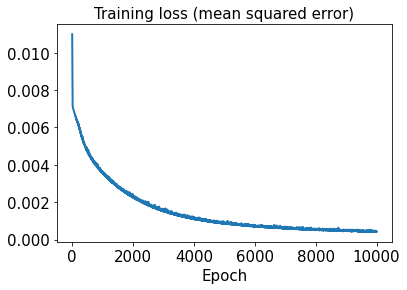

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

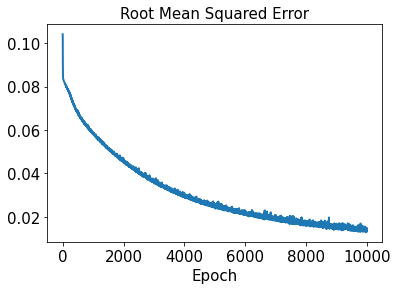

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 2.4356e-04 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.017483698


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

1.241833


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

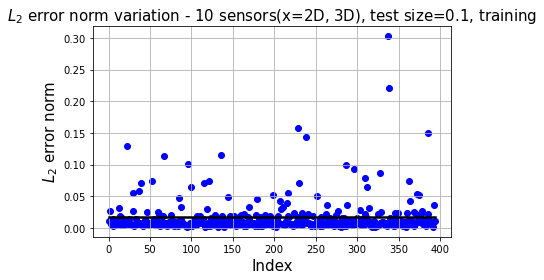

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 3D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

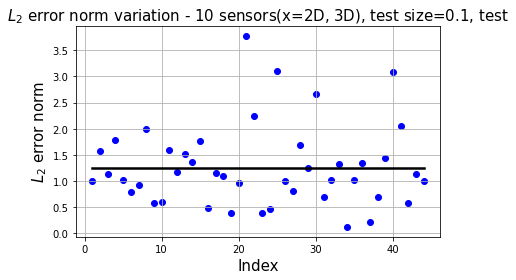

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 3D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

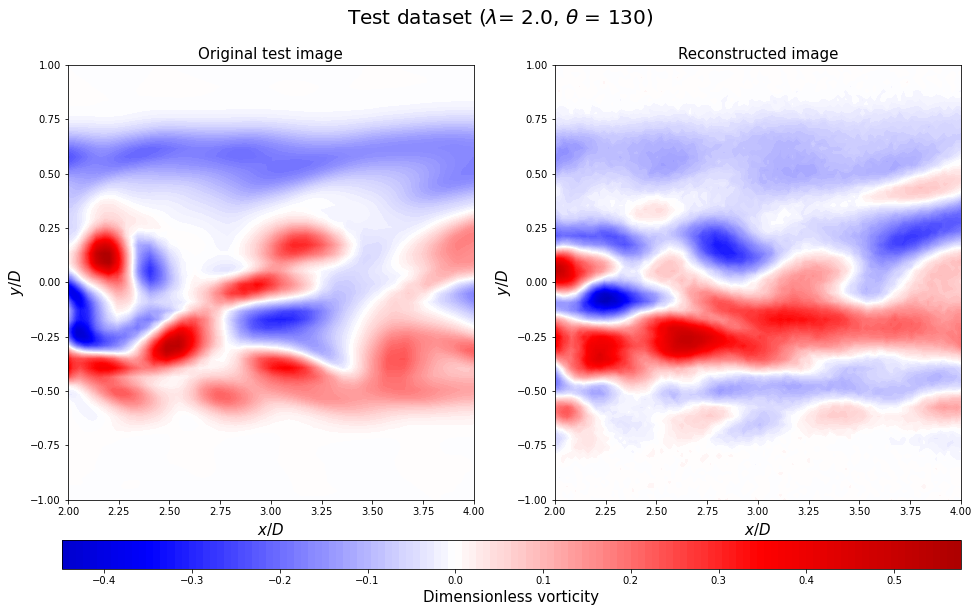

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

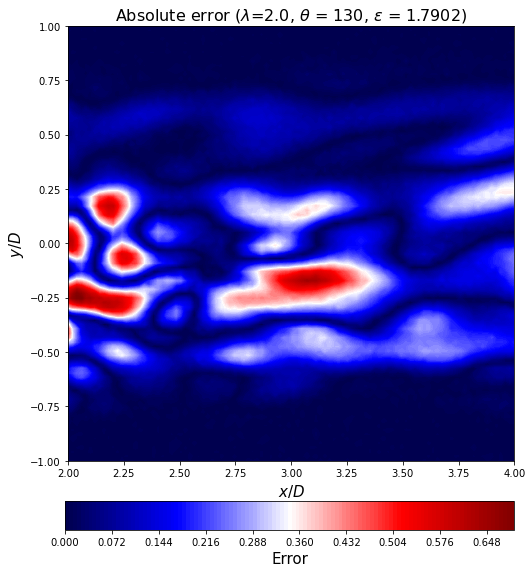

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()